In [1]:
import numpy as np
import matplotlib.pyplot as plt
loaded_data = np.load('E_field_data_combined_extended.npz' , allow_pickle=True)
# print(loaded_data)
E_data_combined = loaded_data['data']
sol =[]

for j in {0,30,60,90}:
    for k in range(-6,7):
        for l in {-1,1}:
            for i in E_data_combined:
                if(i[0] == j and i[1] == k and i[2]==l):
                    sol.append(i);
            print(len(sol))

# print(sol)

86
172
258
344
430
516
602
688
774
860
946
1032
1118
1204
1290
1376
1462
1548
1634
1720
1806
1892
1978
2064
2150
2236
2322
2408
2494
2580
2666
2752
2838
2924
3010
3096
3182
3268
3354
3440
3526
3612
3698
3784
3870
3956
4042
4128
4214
4300
4386
4472
4558
4644
4730
4816
4902
4988
5074
5160
5246
5332
5418
5504
5590
5676
5762
5848
5934
6020
6106
6192
6278
6364
6450
6536
6622
6708
6794
6880
6966
7052
7138
7224
7310
7396
7482
7568
7654
7740
7826
7912
7998
8084
8170
8256
8342
8428
8514
8600
8686
8772
8858
8944


In [2]:
sol = np.array(sol)
print(E_data_combined.shape)
print(sol.shape)

(8944, 5)
(8944, 5)


this is Update version with sol

In [3]:
import numpy as np
import matplotlib.pyplot as plt
loaded_data = np.load("E_field_data_combined_extended.npz", allow_pickle=True)
sol = loaded_data["data"]
conditions = sol[:, :-1].astype(np.float32)  # Convert feature data to float32
matrices = np.array([np.array(matrix, dtype=np.float32) for matrix in sol[:, -1]])  # Convert matrices
y_train = matrices[:, 2:99, 2:179]
y_train_min = y_train.min()
y_train_max = y_train.max()
print(y_train_max , y_train_min)
print(matrices.max() , matrices.min())
# y_train_normalized = (y_train - y_train_min) / (y_train_max - y_train_min)



0.6591242 -0.9574031
278.8553 -242.94159


This is with cluster not sufling and no of cluster 104

Train Ranges: [ 22  85   9   2  32  56  84  62  29  45  88  98  53   8  78  60 103  74
   3  96  86  14 101  40   6  65  17  70  72  30  21  13   7  61  11  95
  75  71  25  67  90  42  89  83   4  36 100  50  28  63  19  47  99  24
  81  48  93  33  52  31  37  27  20  92  73  15  69  59   0  79  49  80]
Validation Ranges: [ 1 68 12  5 57 26 39 43 34 66 41]
Test Ranges: [ 76  23  51  18  82  10  46  64  38  54  77  87  16 102  58  35  97  94
  55  91  44]

Train Indices: [1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 7310, 

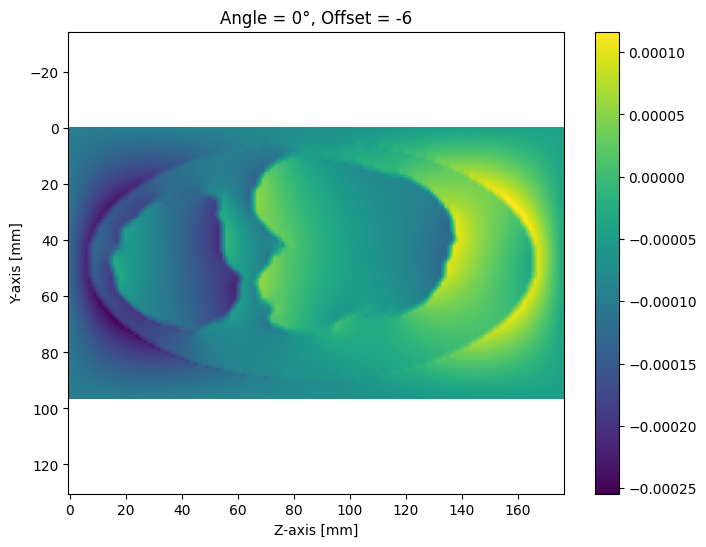

In [4]:
import numpy as np
import matplotlib.pyplot as plt
total_samples = 8944
samples_per_range = 86
num_ranges = total_samples // samples_per_range

# Create ranges
all_ranges = np.arange(num_ranges)
np.random.shuffle(all_ranges)  
train_ranges = all_ranges[:int(0.7 * num_ranges)]
val_ranges = all_ranges[int(0.7 * num_ranges):int(0.8 * num_ranges)]
test_ranges = all_ranges[int(0.8 * num_ranges): int(1.0 * num_ranges)] 

print("Train Ranges:", train_ranges)
print("Validation Ranges:", val_ranges)
print("Test Ranges:", test_ranges)

# Helper function to get indices for each set
def get_indices_from_ranges(ranges, samples_per_range, shuffle=True):
    indices = []
    for r in ranges:
        start = r * samples_per_range
        end = start + samples_per_range
        indices.extend(range(start, end))
    if shuffle:
        np.random.shuffle(indices)
    return indices

# Get indices for train, val, and test sets
train_indices = get_indices_from_ranges(train_ranges, samples_per_range, shuffle=False)
val_indices = get_indices_from_ranges(val_ranges, samples_per_range, shuffle=False)
test_indices = get_indices_from_ranges(test_ranges, samples_per_range, shuffle=False)  # No shuffle

print("\nTrain Indices:", train_indices)
print("Validation Indices:", val_indices)
print("Test Indices:", test_indices)

# Assign data based on indices
X_train_1, y_train_1 = conditions[train_indices], y_train[train_indices]
X_val_1, y_val_1 = conditions[val_indices], y_train[val_indices]
X_test_1, y_test_1 = conditions[test_indices], y_train[test_indices]
# Print shapes of datasets
print("\nShapes of Data:")
print("X_train_1 shape:", X_train_1.shape, "| y_train_1 shape:", y_train_1.shape)
print("X_val_1 shape:", X_val_1.shape, "| y_val_1 shape:", y_val_1.shape)
print("X_test_1 shape:", X_test_1.shape, "| y_test_1 shape:", y_test_1.shape)

# Normalize the datasets
# print("\nGlobal Min (y_train_1):", y_train_min)
# print("Global Max (y_train_1):", y_train_max)

# # Normalize all datasets using training set's global min and max
# y_train_1 = (y_train_1 - y_train_min) / (y_train_max - y_train_min)
# y_val_1 = (y_val_1 - y_train_min) / (y_train_max - y_train_min)
# y_test_1 = (y_test_1 - y_train_min) / (y_train_max - y_train_min)

# Verify normalization
print("\nAfter Normalization:")
print("y_train_1 min:", y_train_1.min(), "| max:", y_train_1.max())
print("y_val_1 min:", y_val_1.min(), "| max:", y_val_1.max())
print("y_test_1 min:", y_test_1.min(), "| max:", y_test_1.max())

# Visualization
selected_index = 84  # Example index for visualization
angle, offset, direction, _, Ex_data = sol[selected_index]
a_check = y_test_1[0].flatten().reshape(97, 177)

plt.figure(figsize=(8, 6))
img = plt.imshow(a_check, cmap="viridis", aspect="auto")
plt.title(f'Angle = {angle}°, Offset = {offset}')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.axis('equal')
plt.colorbar(img)
plt.show()


## Now , we are find the Recruiyment Index  and Selectivity index  

update on the test dataset 

In [5]:
def optimize_dataset(X_data, y_data, samples_per_range=86):
    """
    Optimize both X and Y datasets by calculating differences for consecutive matrices.
    
    Parameters:
        X_data (numpy.ndarray): Feature dataset.
        y_data (numpy.ndarray): Label dataset.
        samples_per_range (int): Number of samples per interval.
    
    Returns:
        tuple: Optimized X, Y datasets and updated intervals.
    """
    n_samples = len(X_data)
    n_intervals = n_samples // samples_per_range
    opt_X, opt_y, updated_intervals = [], [], []

    for i in range(n_intervals):
        start, end = i * samples_per_range, (i + 1) * samples_per_range
        X_interval = X_data[start:end]
        y_interval = y_data[start:end]
        
        # Calculate differences between consecutive elementswh
        diff_X = np.diff(X_interval, axis=0)
        diff_y = np.diff(y_interval, axis=0)
        
        opt_X.append(diff_X)
        opt_y.append(diff_y)
        updated_intervals.append((start, start + len(diff_X) - 1))
        
        print(f"Interval {i + 1}: Start={start}, End={end - 1}, Removed={end - 1}")
        print(f"Updated Interval {i + 1}: Start={start}, End={start + len(diff_X) - 1}")

    # Combine the optimized data
    opt_X = np.vstack(opt_X)
    opt_y = np.vstack(opt_y)
    
    print(f"\nOriginal X Shape: {X_data.shape}, Optimized X Shape: {opt_X.shape}")
    print(f"Original Y Shape: {y_data.shape}, Optimized Y Shape: {opt_y.shape}")
    
    print("\nUpdated Intervals:")
    for i, (s, e) in enumerate(updated_intervals, 1):
        print(f"Interval {i}: Start={s}, End={e}")
        
    return opt_X, opt_y, updated_intervals

# Example usage
opt_X, opt_y, updated_intervals = optimize_dataset(X_test_1, y_test_1)
print(f"\nOptimized X Shape: {opt_X.shape}, Optimized Y Shape: {opt_y.shape}")
print(f"Updated Intervals: {updated_intervals}")


Interval 1: Start=0, End=85, Removed=85
Updated Interval 1: Start=0, End=84
Interval 2: Start=86, End=171, Removed=171
Updated Interval 2: Start=86, End=170
Interval 3: Start=172, End=257, Removed=257
Updated Interval 3: Start=172, End=256
Interval 4: Start=258, End=343, Removed=343
Updated Interval 4: Start=258, End=342
Interval 5: Start=344, End=429, Removed=429
Updated Interval 5: Start=344, End=428
Interval 6: Start=430, End=515, Removed=515
Updated Interval 6: Start=430, End=514
Interval 7: Start=516, End=601, Removed=601
Updated Interval 7: Start=516, End=600
Interval 8: Start=602, End=687, Removed=687
Updated Interval 8: Start=602, End=686
Interval 9: Start=688, End=773, Removed=773
Updated Interval 9: Start=688, End=772
Interval 10: Start=774, End=859, Removed=859
Updated Interval 10: Start=774, End=858
Interval 11: Start=860, End=945, Removed=945
Updated Interval 11: Start=860, End=944
Interval 12: Start=946, End=1031, Removed=1031
Updated Interval 12: Start=946, End=1030
Inte

In [6]:
import numpy as np

def create_max_image_per_interval(opt_y, updated_intervals):
    """
    Create a single maximized image for each interval by taking the pixel-wise maximum
    over all frames in that interval.

    Parameters:
    -----------
    opt_y : numpy.ndarray
        Optimized Y dataset of shape (N, H, W), where N is the number of frames,
        and (H, W) = (97, 177) in your example.
    updated_intervals : list of tuples
        List of (start, end) index pairs indicating the intervals (inclusive).

    Returns:
    --------
    final_images : numpy.ndarray
        An array of shape (num_intervals, H, W) where each entry is the pixel-wise
        maximum across all frames in the corresponding interval.
    """
    final_images = []

    for i, (start, end) in enumerate(updated_intervals, 1):
        # Slice the opt_y data for the current interval
        interval_data = opt_y[start : end + 1]  # end+1 because 'end' is inclusive
        
        # Compute the pixel-wise maximum across the interval
        max_image = np.max(interval_data, axis=0)
        
        final_images.append(max_image)
        
        print(f"Interval {i}: Start={start}, End={end}, "
              f"Interval shape={interval_data.shape}, Max image shape={max_image.shape}")
    
    # Convert list of images to a single NumPy array
    final_images = np.array(final_images)
    return final_images

# Example usage (assuming 'opt_y' and 'updated_intervals' are already defined):
final_images = create_max_image_per_interval(opt_y, updated_intervals)
print("Final images shape:", final_images.shape)


Interval 1: Start=0, End=84, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 2: Start=86, End=170, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 3: Start=172, End=256, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 4: Start=258, End=342, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 5: Start=344, End=428, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 6: Start=430, End=514, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 7: Start=516, End=600, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 8: Start=602, End=686, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 9: Start=688, End=772, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 10: Start=774, End=858, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 11: Start=860, End=944, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 12: Start=946, End=1030, 

# plotting image for each interval  fior testing data 

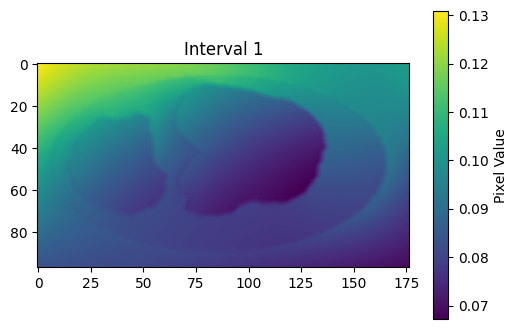

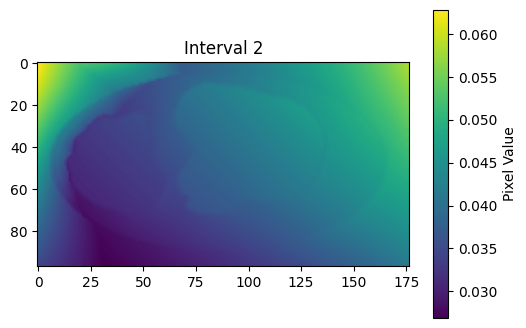

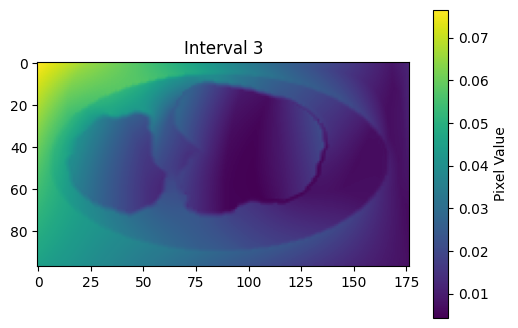

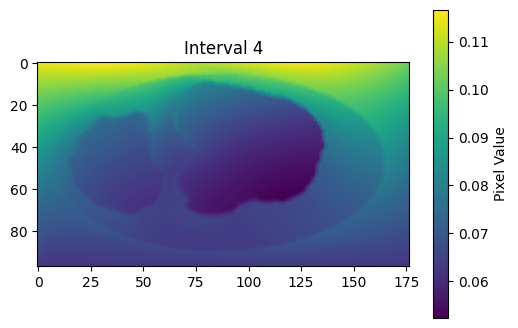

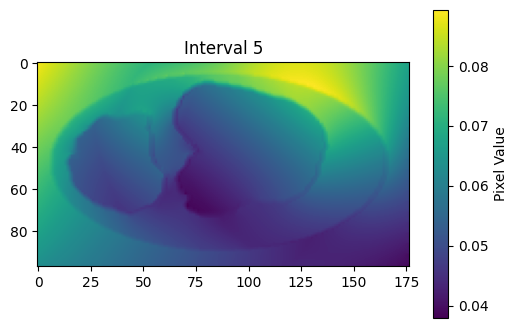

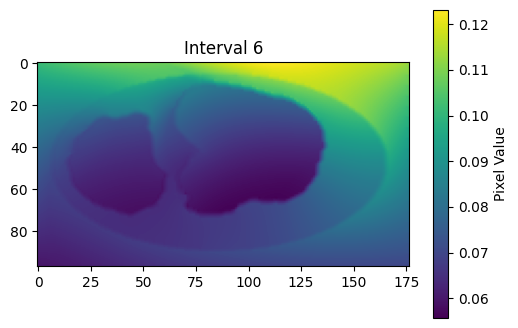

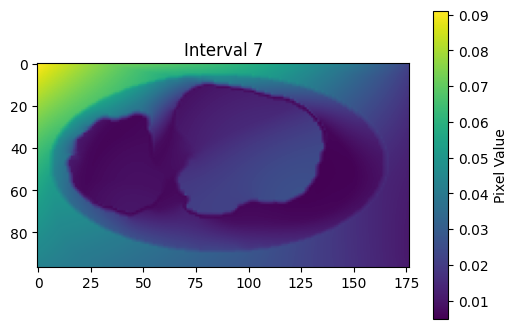

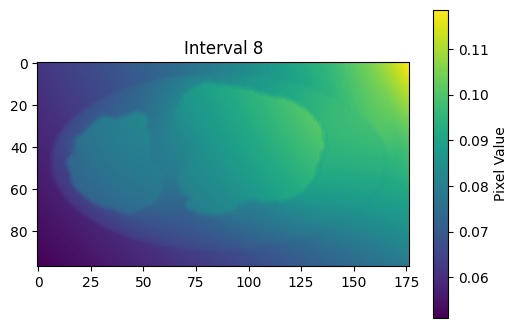

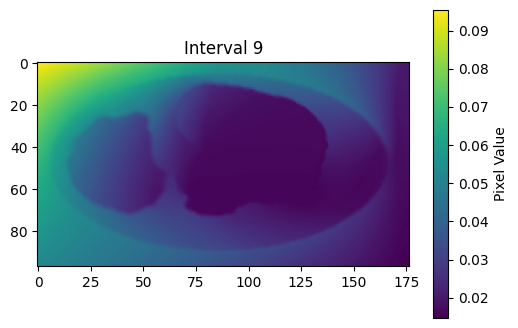

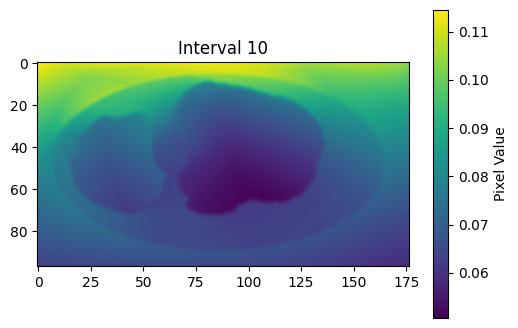

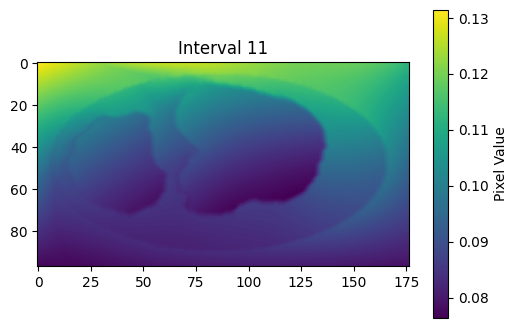

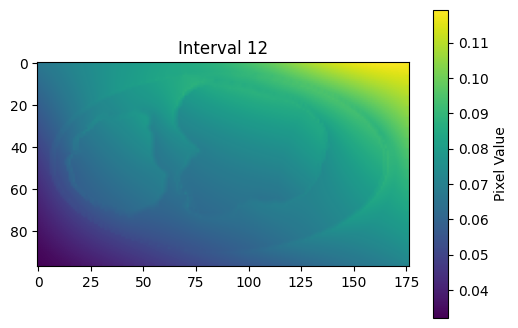

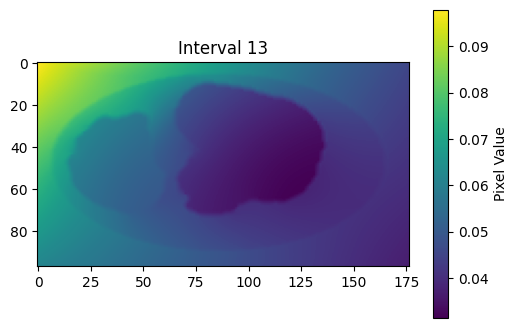

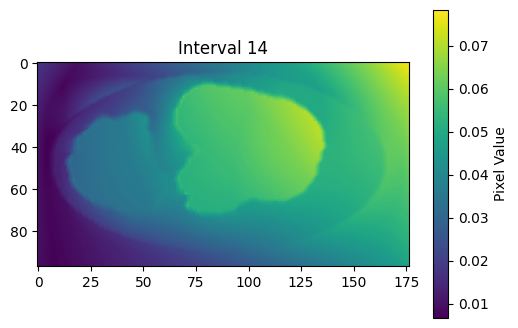

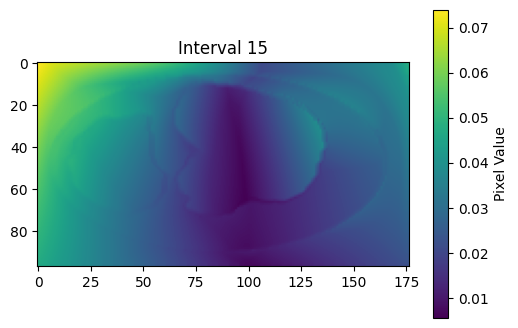

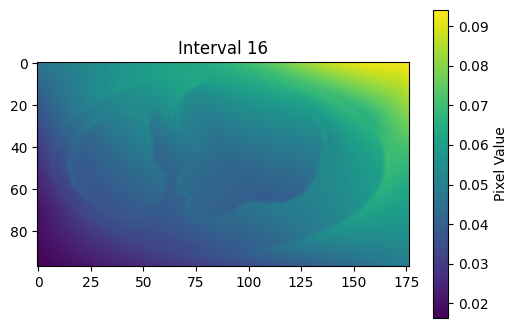

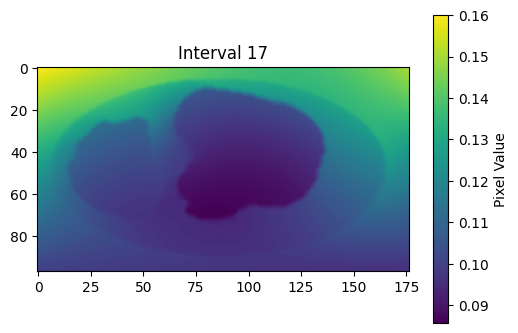

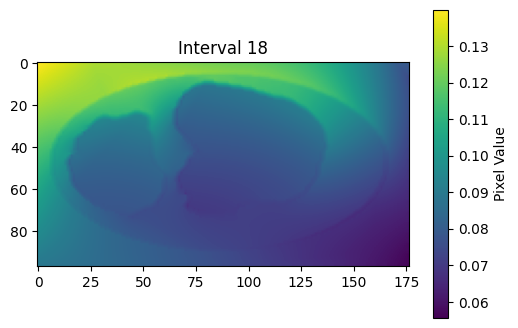

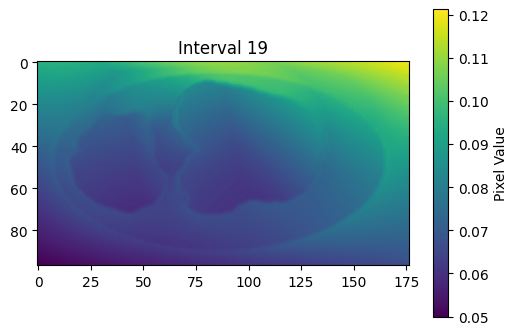

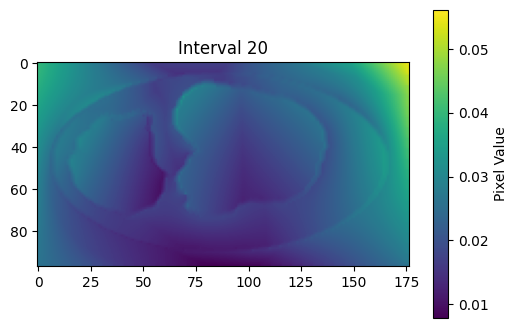

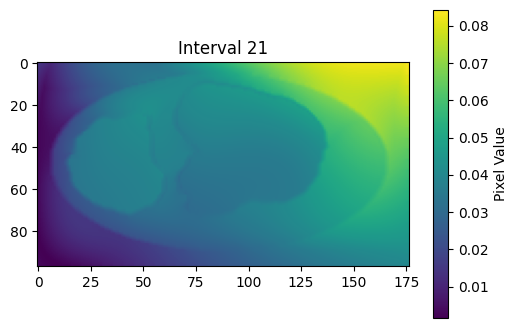

In [7]:
import matplotlib.pyplot as plt

def visualize_final_images(final_images):
    """
    Visualize each image in `final_images` using a viridis colormap.
    
    Parameters:
    -----------
    final_images : numpy.ndarray
        Array of shape (num_intervals, H, W), where each slice along the
        first dimension is the image you want to visualize.
    """
    for i, image in enumerate(final_images, start=1):
        plt.figure(figsize=(6, 4))
        plt.imshow(image, cmap='viridis')
        plt.title(f"Interval {i}")
        plt.colorbar(label='Pixel Value')
        plt.show()

# Example usage after creating final_images:
visualize_final_images(final_images)


## now , we are to make the nerver selected fascicle

In [8]:
import numpy as np
loaded_nerve = np.load('nerve_2D_cross_section.npy')
loaded_nerve = loaded_nerve[2:99, 2:179]
print(loaded_nerve.min())
print(loaded_nerve.max())
print("Loaded nerve shape:", loaded_nerve.shape)

1.0
5.0
Loaded nerve shape: (97, 177)


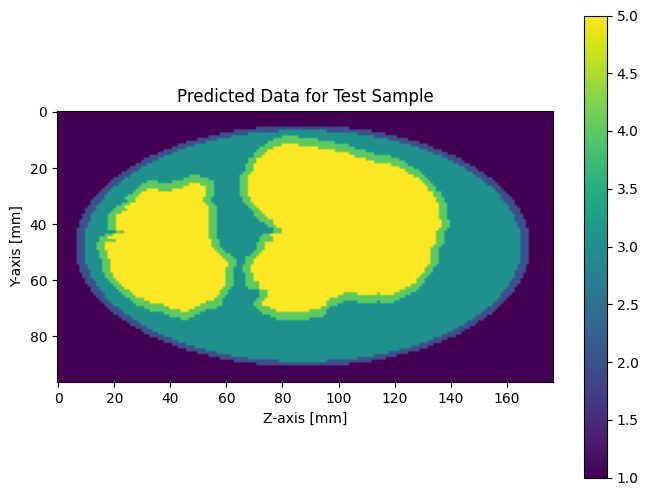

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
img_pred= plt.imshow(loaded_nerve, cmap='viridis')  # Plot predicted data slice
plt.title(f'Predicted Data for Test Sample')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.colorbar(img_pred)
plt.show()

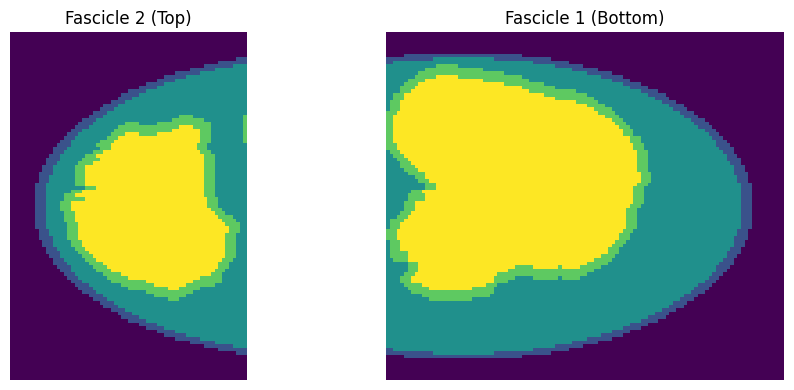

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_fascicles_single(image):
    """
    Visualize the fascicle parts from a single image.
    
    Fascicle 2 (top): rows 0:66
    Fascicle 1 (bottom): rows 66:97

    Parameters
    ----------
    image : numpy.ndarray
        Array of shape (97, 177)
    """
    # Fascicle 2 (top portion): rows 0 to 65
    fascicle2 = image[:, :66]   # shape (66, 177)
    # Fascicle 1 (bottom portion): rows 66 to 96
    fascicle1 = image[:, 66:]   # shape (31, 177)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Show Fascicle 2 (Top)
    axes[0].imshow(fascicle2, cmap='viridis')
    axes[0].set_title("Fascicle 2 (Top)")
    axes[0].axis('off')  # Hide axes

    # Show Fascicle 1 (Bottom)
    axes[1].imshow(fascicle1, cmap='viridis')
    axes[1].set_title("Fascicle 1 (Bottom)")
    axes[1].axis('off')  # Hide axes

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Example usage:
# Create a dummy image of size (97, 177)
# image = np.random.rand(97, 177)
visualize_fascicles_single(loaded_nerve)


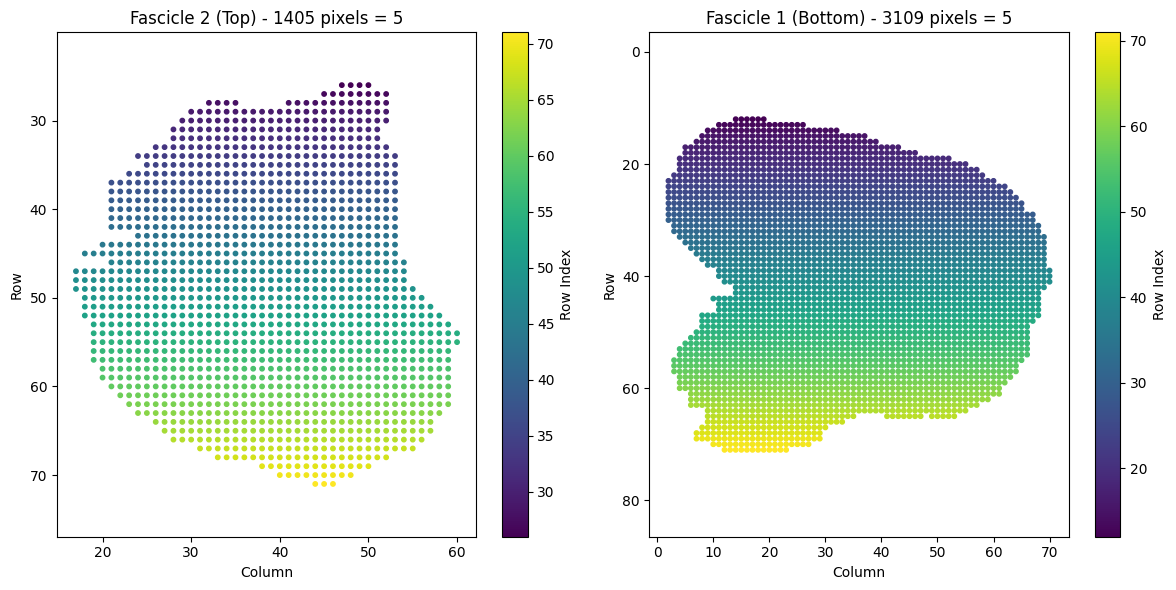

Value of N1 and N2 are: 1405 3109
Top coordinates:
 [[26 47]
 [26 48]
 [26 49]
 ...
 [71 44]
 [71 45]
 [71 46]]
Bottom coordinates:
 [[12 14]
 [12 15]
 [12 16]
 ...
 [71 21]
 [71 22]
 [71 23]]


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_fascicles_single(image):
    # -- Fix #1: Split the image along the row dimension to match the docstring --
    fascicle2 = image[:,:66]   # Top portion: rows 0 to 65
    fascicle1 = image[:,66:]   # Bottom portion: rows 66 to 96

    # Find indices where the pixel value equals 5
    top_y, top_x = np.where(fascicle2 == 5)
    bottom_y, bottom_x = np.where(fascicle1 == 5)

    # Count the number of pixels equal to 5 in each fascicle
    N1 = len(top_y)
    N2 = len(bottom_y)

    # Store coordinates as (row, column)
    top_coords = np.column_stack((top_y, top_x))
    bottom_coords = np.column_stack((bottom_y, bottom_x))

    # Create figure for scatter plot visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # -- Fix #2: Use cmap instead of the incorrect 'cmp' --
    # Plot for Fascicle 2 (Top)
    scatter_top = axes[0].scatter(top_x, top_y, c=top_y, cmap="viridis", s=10)
    axes[0].set_title(f"Fascicle 2 (Top) - {N1} pixels = 5")
    axes[0].set_xlim(0, fascicle2.shape[1])
    axes[0].set_ylim(fascicle2.shape[0], 0)  # Invert y-axis
    axes[0].set_xlabel("Column")
    axes[0].set_ylabel("Row")
    axes[0].axis("equal")
    fig.colorbar(scatter_top, ax=axes[0], label="Row Index")

    # Plot for Fascicle 1 (Bottom)
    scatter_bottom = axes[1].scatter(bottom_x, bottom_y, c=bottom_y, cmap="viridis", s=10)
    axes[1].set_title(f"Fascicle 1 (Bottom) - {N2} pixels = 5")
    axes[1].set_xlim(0, fascicle1.shape[1])
    axes[1].set_ylim(fascicle1.shape[0], 0)  # Invert y-axis
    axes[1].set_xlabel("Column")
    axes[1].set_ylabel("Row")
    axes[1].axis("equal")
    fig.colorbar(scatter_bottom, ax=axes[1], label="Row Index")

    plt.tight_layout()
    plt.show()

    return N1, N2, top_coords, bottom_coords

# Example usage:
# loaded_nerve = np.random.randint(0, 10, size=(97, 177))  # Example dummy data
N1, N2, top_coords, bottom_coords = visualize_fascicles_single(loaded_nerve)
print("Value of N1 and N2 are:", N1, N2)
print("Top coordinates:\n", top_coords)
print("Bottom coordinates:\n", bottom_coords)


Image 1: Displaying 4514 pixels from reference fascicle locations.


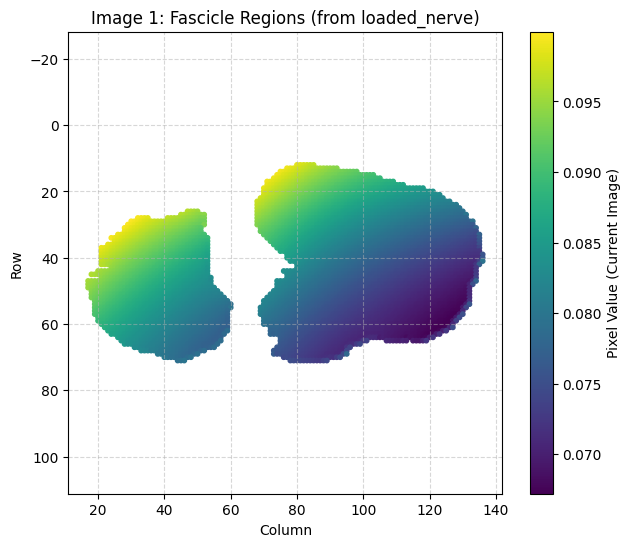

Image 2: Displaying 4514 pixels from reference fascicle locations.


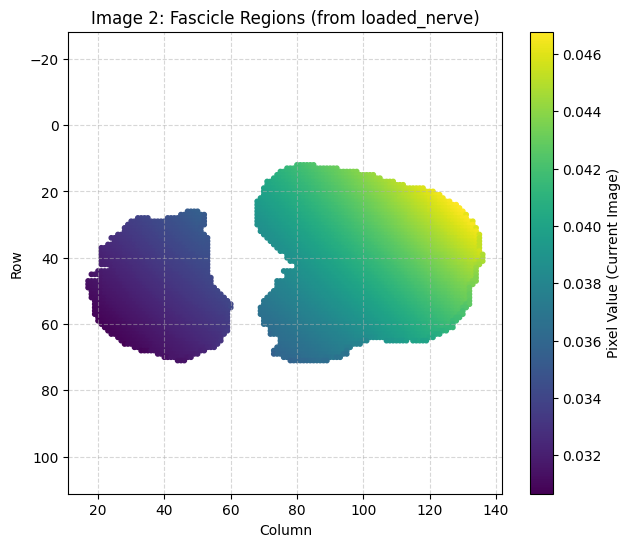

Image 3: Displaying 4514 pixels from reference fascicle locations.


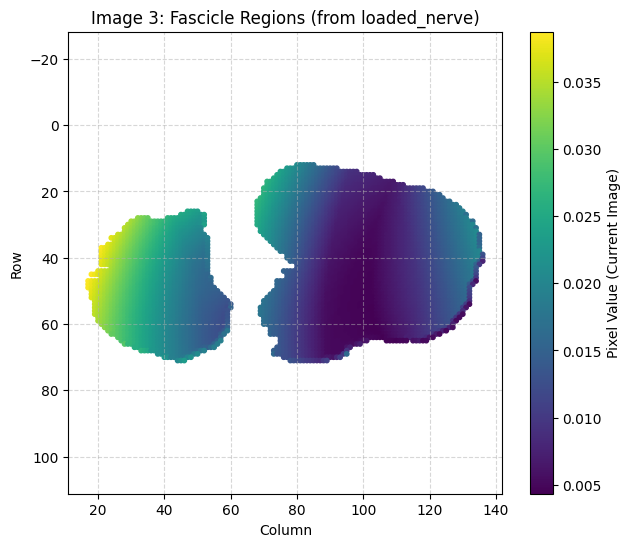

Image 4: Displaying 4514 pixels from reference fascicle locations.


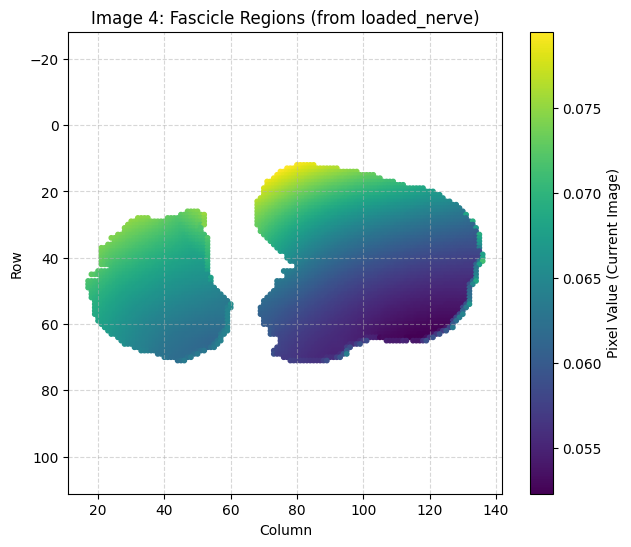

Image 5: Displaying 4514 pixels from reference fascicle locations.


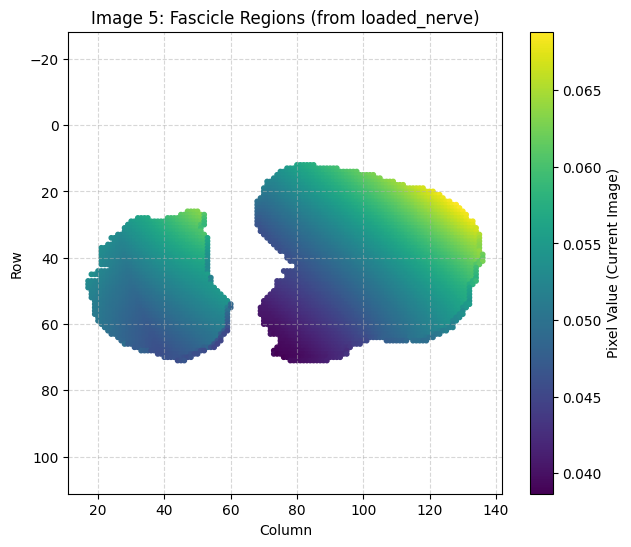

Image 6: Displaying 4514 pixels from reference fascicle locations.


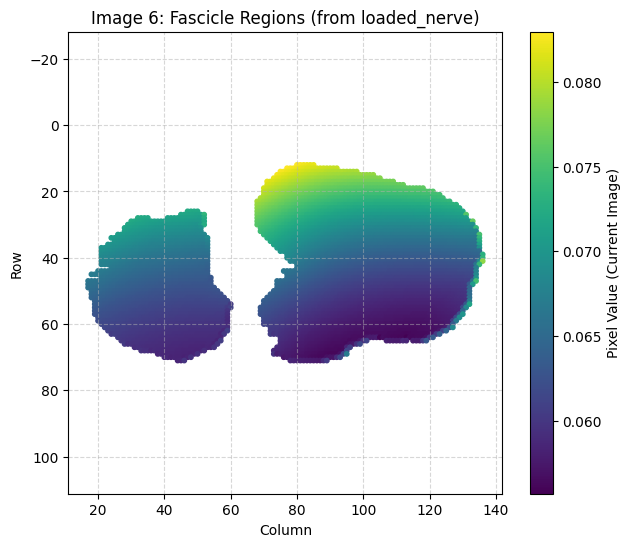

Image 7: Displaying 4514 pixels from reference fascicle locations.


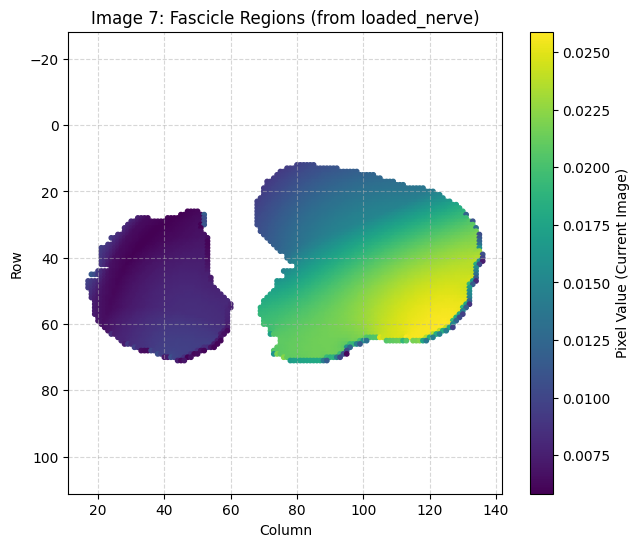

Image 8: Displaying 4514 pixels from reference fascicle locations.


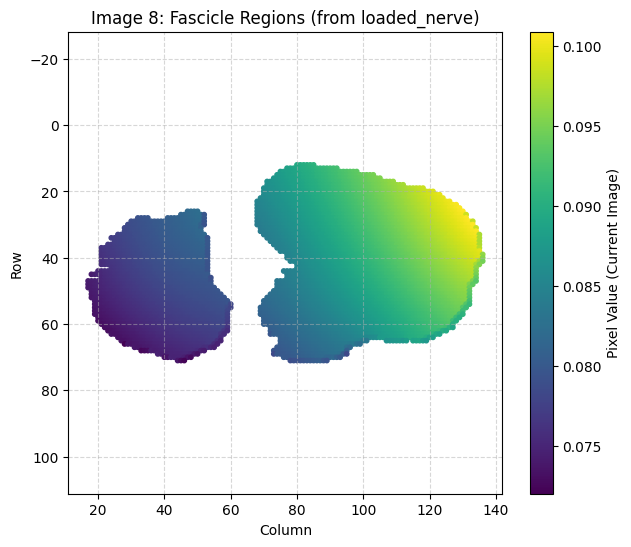

Image 9: Displaying 4514 pixels from reference fascicle locations.


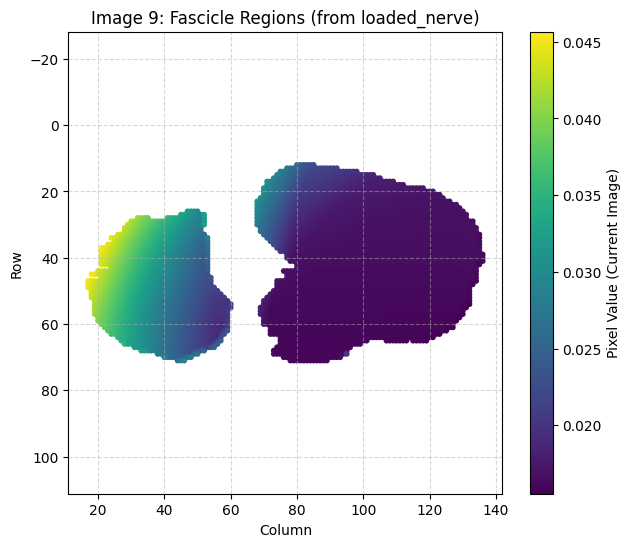

Image 10: Displaying 4514 pixels from reference fascicle locations.


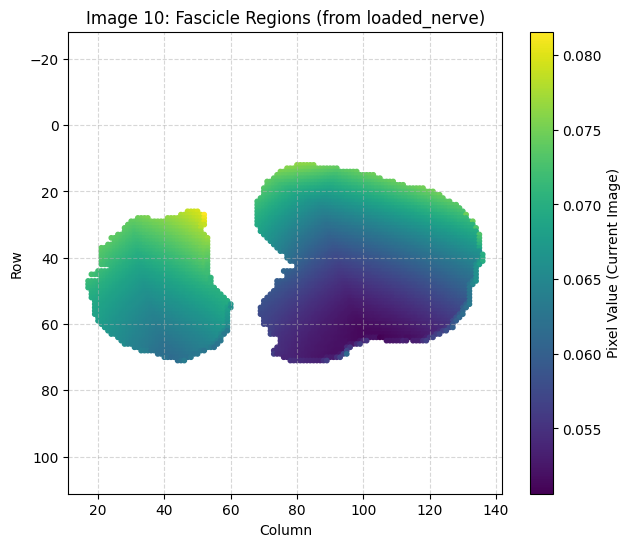

Image 11: Displaying 4514 pixels from reference fascicle locations.


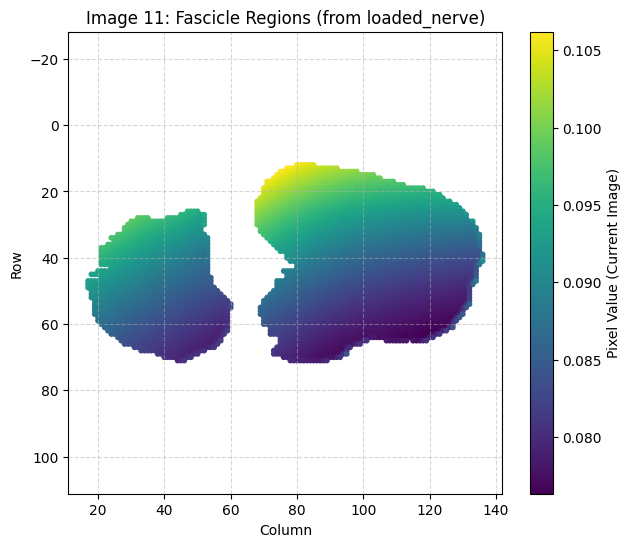

Image 12: Displaying 4514 pixels from reference fascicle locations.


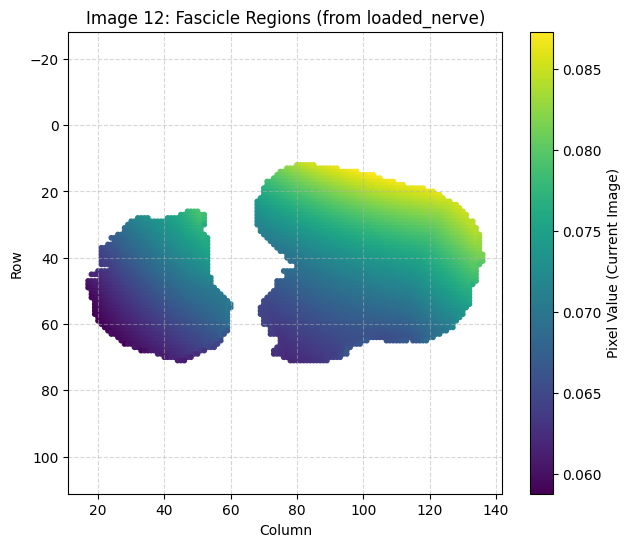

Image 13: Displaying 4514 pixels from reference fascicle locations.


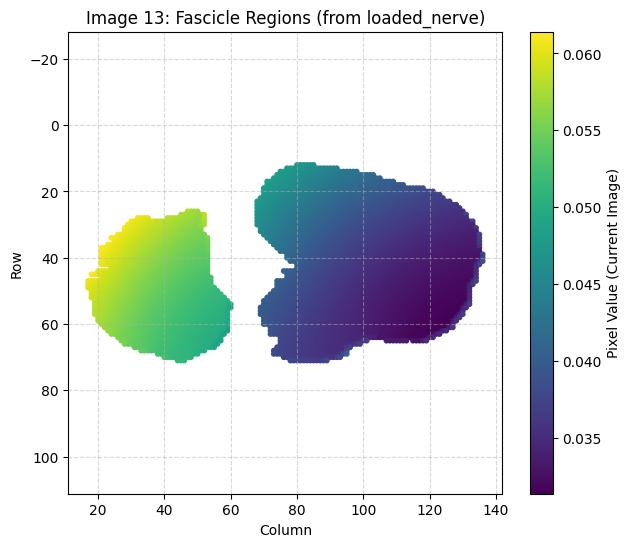

Image 14: Displaying 4514 pixels from reference fascicle locations.


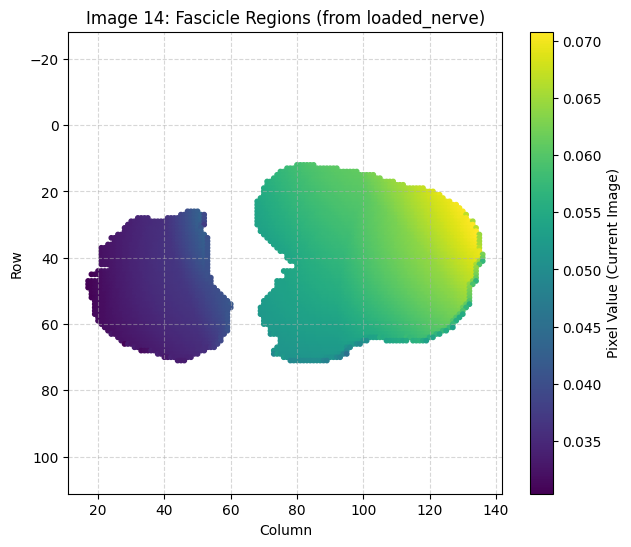

Image 15: Displaying 4514 pixels from reference fascicle locations.


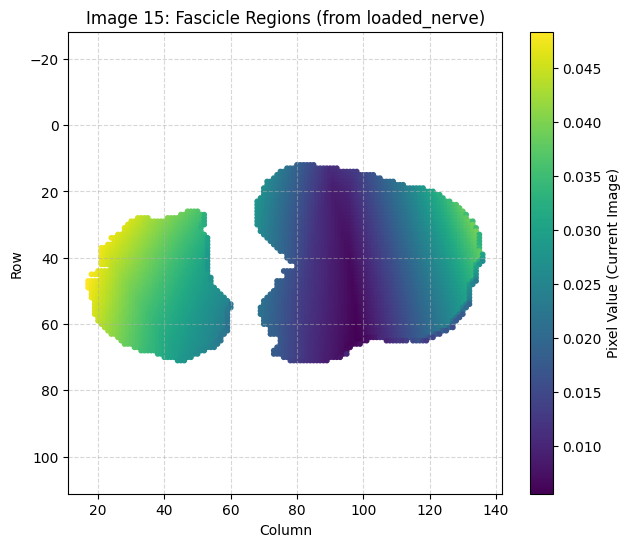

Image 16: Displaying 4514 pixels from reference fascicle locations.


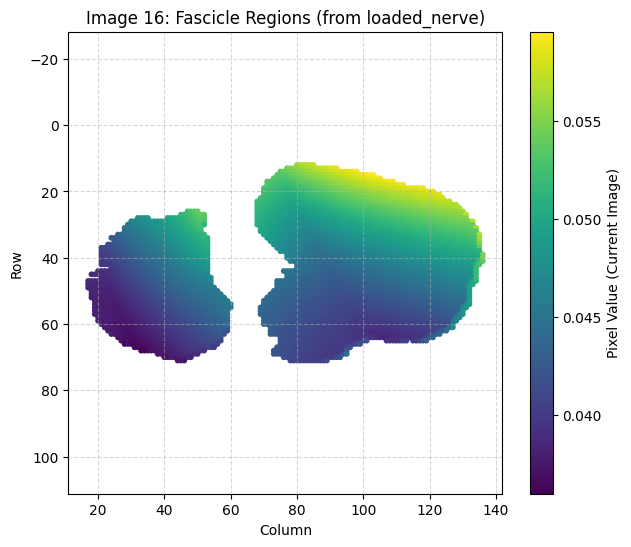

Image 17: Displaying 4514 pixels from reference fascicle locations.


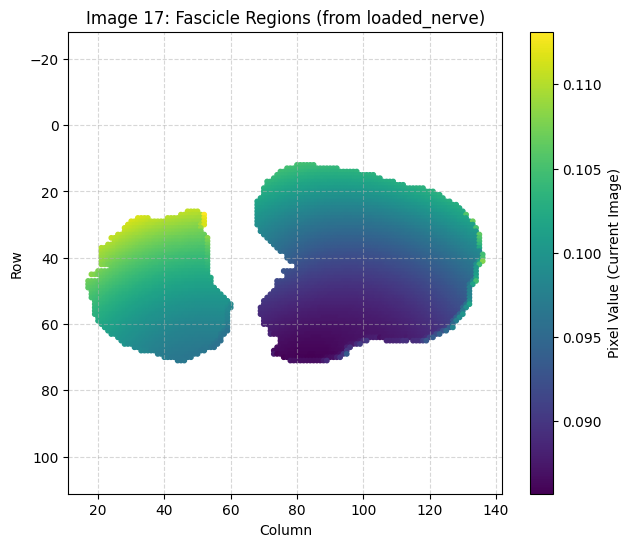

Image 18: Displaying 4514 pixels from reference fascicle locations.


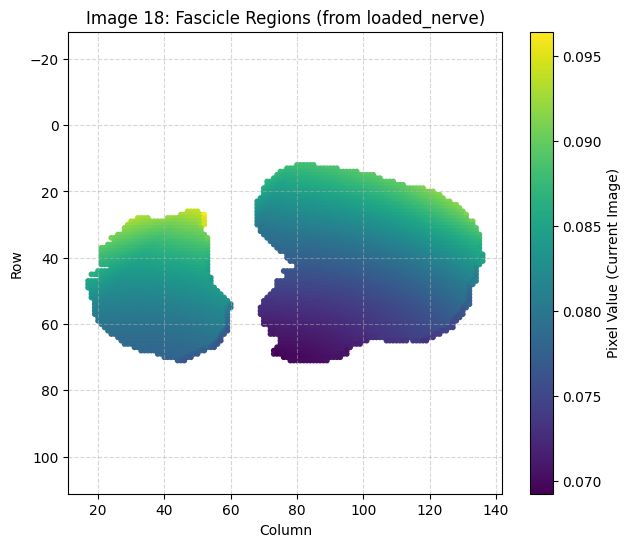

Image 19: Displaying 4514 pixels from reference fascicle locations.


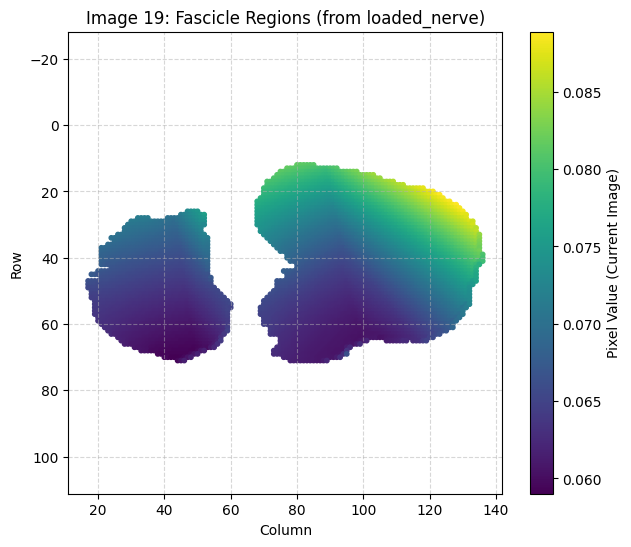

Image 20: Displaying 4514 pixels from reference fascicle locations.


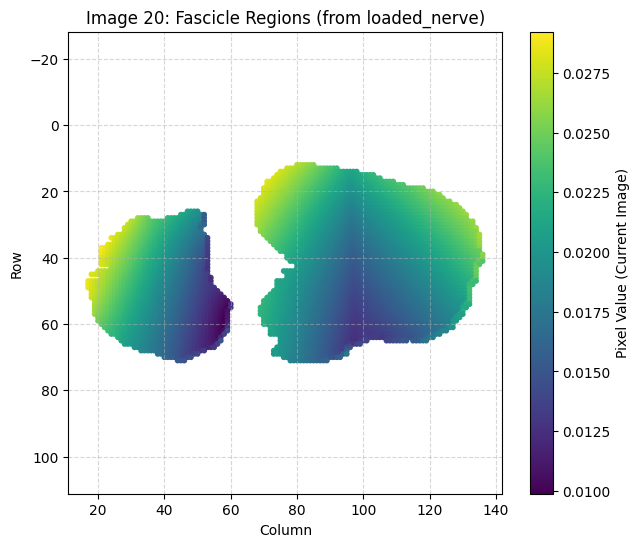

Image 21: Displaying 4514 pixels from reference fascicle locations.


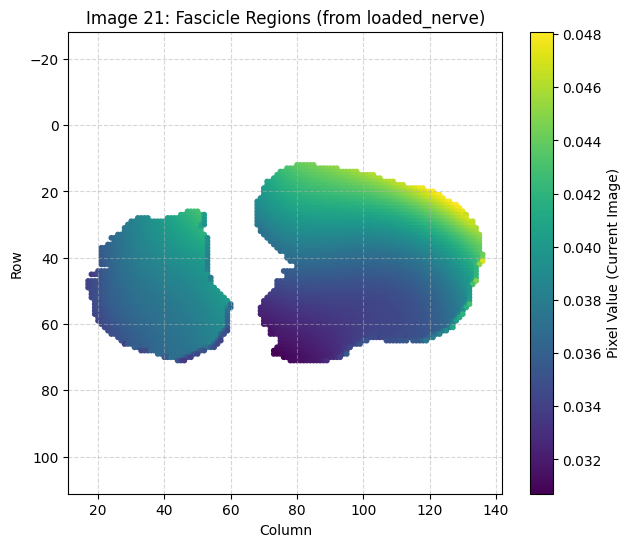

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def get_reference_coordinates(loaded_nerve):
    """
    Get coordinates from loaded_nerve where value is 5 (fascicle regions).
    
    Parameters
    ----------
    loaded_nerve : np.ndarray
        Reference image (97, 177) for fascicle regions.

    Returns
    -------
    fascicle_coords : np.ndarray
        Array of shape (N, 2) with (row, column) coordinates.
    """
    ref_y, ref_x = np.where(loaded_nerve == 5)
    fascicle_coords = np.column_stack((ref_y, ref_x))
    return fascicle_coords


def visualize_with_reference(final_images, fascicle_coords):
    """
    Visualize values from each image at locations defined by loaded_nerve.
    
    Parameters
    ----------
    final_images : np.ndarray
        Array of shape (21, 97, 177).
    fascicle_coords : np.ndarray
        Coordinates from loaded_nerve where value == 5.
    """
    for i, img in enumerate(final_images, start=1):
        # Extract values from current image using reference coordinates
        values = img[fascicle_coords[:, 0], fascicle_coords[:, 1]]

        # Display the number of matched pixels
        N = len(values)
        print(f"Image {i}: Displaying {N} pixels from reference fascicle locations.")

        # Create scatter plot
        plt.figure(figsize=(7, 6))
        scatter = plt.scatter(
            fascicle_coords[:, 1], fascicle_coords[:, 0],
            c=values, cmap='viridis', s=10
        )
        plt.title(f"Image {i}: Fascicle Regions (from loaded_nerve)")
        plt.xlabel("Column")
        plt.ylabel("Row")
        plt.gca().invert_yaxis()  # Invert y-axis for image coordinates
        plt.colorbar(scatter, label="Pixel Value (Current Image)")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.axis('equal')
        plt.show()




# Step 1: Get fascicle coordinates from 'loaded_nerve'
fascicle_coords = get_reference_coordinates(loaded_nerve)

# Step 2: Visualize each image at reference locations
visualize_with_reference(final_images, fascicle_coords)
